In [2]:
import numpy as np
import pandas as pd
import sys
import os
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import UnsupervisedFeatureSelection as unsup_fs
from src.plotting import plot_pairwise_correlations

In [3]:
proc = GatherFeatureDatasets(is_p=True)

In [4]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
all_train_df = pd.read_csv(f'{data_dir}/p.train.csv')

In [5]:
# Use station YUF for experimenting with models because it has 1433 training examples, 
# which is ~half as much as YNR, so training should go faster. But should still be enough 
# examples for training good models. It is also one of the stations with a 
# UUSS correction, so already used for magnitude calculations and amplitudes should be good quality. 
stat = "YUF"
station_feature_dict, station_meta_dict, feature_names = proc.process_station_datasets(stat, 
                                                                                        all_train_df,
                                                                                        scaler=False,
                                                                                        linear_model=False,
                                                                                        source_dist_type='dist')

YUF
X shape: (1676, 45), y shape: (1676,)


In [6]:
X = station_feature_dict['X_train']
y = station_meta_dict['y_train']

In [12]:
kept_features = unsup_fs.remove_highly_correlated_features(X, thresh=0.85)

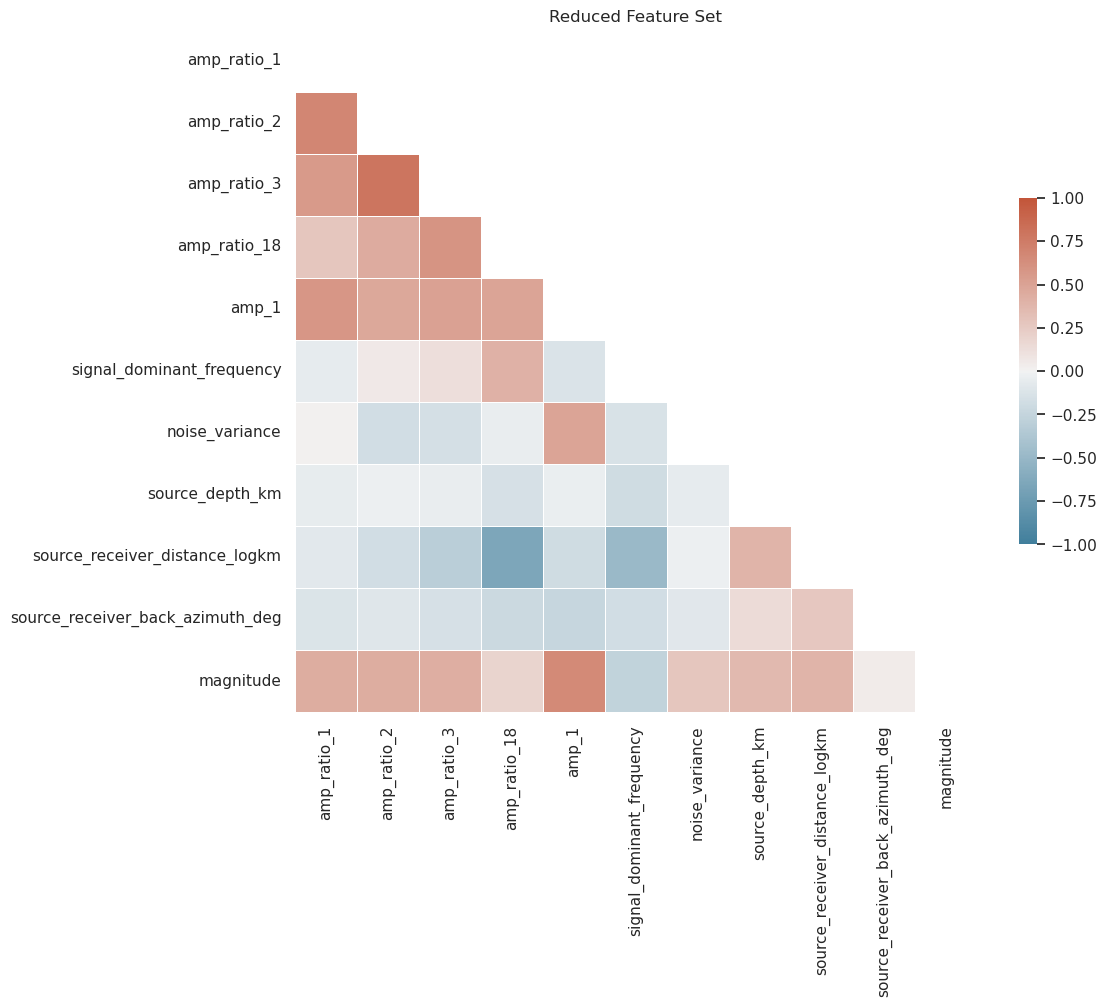

In [13]:
kept_feature_names = feature_names[kept_features]
plot_pairwise_correlations(X[:, kept_features], y, kept_feature_names, "Reduced Feature Set",
                           xticklabels=1)

In [9]:
pd.DataFrame(X[:, kept_features]).corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.562364,0.275660,0.580444,-0.061465,0.014686,-0.049222,-0.084121,-0.123636
1,0.562364,1.000000,0.599660,0.508768,0.121820,-0.161828,-0.042287,-0.310212,-0.151805
2,0.275660,0.599660,1.000000,0.497920,0.412070,-0.044811,-0.154093,-0.650257,-0.215734
3,0.580444,0.508768,0.497920,1.000000,-0.131475,0.495302,-0.038966,-0.193261,-0.238118
4,-0.061465,0.121820,0.412070,-0.131475,1.000000,-0.137694,-0.188461,-0.490849,-0.178528
5,0.014686,-0.161828,-0.044811,0.495302,-0.137694,1.000000,-0.055618,-0.027059,-0.092027
6,-0.049222,-0.042287,-0.154093,-0.038966,-0.188461,-0.055618,1.000000,0.393297,0.142327
7,-0.084121,-0.310212,-0.650257,-0.193261,-0.490849,-0.027059,0.393297,1.000000,0.271845
8,-0.123636,-0.151805,-0.215734,-0.238118,-0.178528,-0.092027,0.142327,0.271845,1.000000
